In [1]:
from os import listdir

import numpy as np
import pandas as pd

from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN

from matplotlib import pyplot as plt

from ipynb.fs.full.GenerateLogs import generate_log

In [2]:
data_path = '../data/'
embeddings_path = lambda dataset_name: '%s%s_embeddings.npz' % (data_path, dataset_name)

# Return ids of images in each dataset as a list
names_path = lambda dataset_name: '%s%s-names.txt' % (data_path, dataset_name)
def retrive_ids(filepath):
    with open(filepath, 'r') as file:
        ids = file.read().split()
    return ids

# Get ideal DBScan parameters

In [5]:
datasets = ['celeb_a_1', 'celeb_a_2']

data_dfs = []
for name in datasets:
    data_df = pd.DataFrame(np.load(embeddings_path(name))['arr_0'])
    data_df['id'] = retrive_ids(names_path(name))
    
    data_dfs.append(data_df)
    
train_data_df = pd.concat(data_dfs)
train_data_df = train_data_df.sample(frac=1).reset_index(drop=True)
X = train_data_df.drop(columns='id').values

print('Dataset contains %s images of %s different people' % (len(train_data_df), len(train_data_df['id'].value_counts().keys())))

Dataset contains 40995 images of 2000 different people


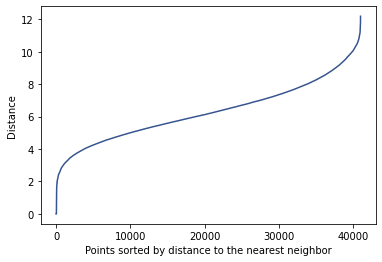

In [42]:
# Plot nearest neighbout values to know what values of epsilon to try
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances, color='#36558F')
plt.xlabel('Points sorted by distance to the nearest neighbor')
plt.ylabel('Distance')
plt.savefig('figs/dbscan-parameter-estimation-0.png', bbox_inches='tight', dpi=100)
plt.show()

In [11]:
est_errors = []
for epsilon in np.arange(2,12,0.5):
    db = DBSCAN(eps=epsilon, min_samples=1).fit(X)
    labels = pd.Series(db.labels_)

    n_people = len(train_data_df['id'].value_counts().keys())
    n_clusters = len(list(labels.value_counts().values))

    est_error = (abs(n_clusters - n_people) / n_people) * 100
    est_errors.append(est_error)

    print('eps: %f, people: %d clusters: %d error: %f' % (epsilon, n_people, n_clusters, est_error))

eps: 2.000000, people: 2000 clusters: 40927 error: 1946.350000
eps: 2.500000, people: 2000 clusters: 40794 error: 1939.700000
eps: 3.000000, people: 2000 clusters: 40501 error: 1925.050000
eps: 3.500000, people: 2000 clusters: 39898 error: 1894.900000
eps: 4.000000, people: 2000 clusters: 38713 error: 1835.650000
eps: 4.500000, people: 2000 clusters: 36624 error: 1731.200000
eps: 5.000000, people: 2000 clusters: 33592 error: 1579.600000
eps: 5.500000, people: 2000 clusters: 29724 error: 1386.200000
eps: 6.000000, people: 2000 clusters: 25124 error: 1156.200000
eps: 6.500000, people: 2000 clusters: 20543 error: 927.150000
eps: 7.000000, people: 2000 clusters: 16262 error: 713.100000
eps: 7.500000, people: 2000 clusters: 12584 error: 529.200000
eps: 8.000000, people: 2000 clusters: 9586 error: 379.300000
eps: 8.500000, people: 2000 clusters: 7103 error: 255.150000
eps: 9.000000, people: 2000 clusters: 4965 error: 148.250000
eps: 9.500000, people: 2000 clusters: 3020 error: 51.000000
eps:

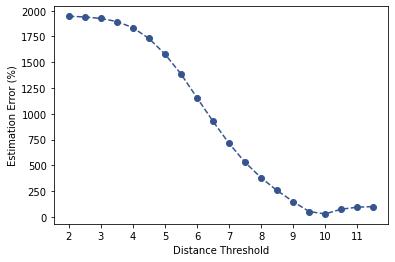

In [36]:
# Plot graph
plt.plot(np.arange(2,12,0.5), est_errors, color='#36558F', linestyle='dashed', marker='o')
plt.xticks(np.arange(2,12,1))
plt.xlabel('Distance Threshold')
plt.ylabel('Estimation Error (%)')
plt.savefig('figs/dbscan-parameter-estimation-1.png', bbox_inches='tight', dpi=100)
plt.show()

In [37]:
est_errors = []
for epsilon in np.arange(9.5,10.5, 0.1):
    db = DBSCAN(eps=epsilon, min_samples=1).fit(X)
    labels = pd.Series(db.labels_)

    n_people = len(train_data_df['id'].value_counts().keys())
    n_clusters = len(list(labels.value_counts().values))

    est_error = (abs(n_clusters - n_people) / n_people) * 100
    est_errors.append(est_error)

    print('eps: %f, people: %d clusters: %d error: %f' % (epsilon, n_people, n_clusters, est_error))

eps: 9.500000, people: 2000 clusters: 3020 error: 51.000000
eps: 9.600000, people: 2000 clusters: 2674 error: 33.700000
eps: 9.700000, people: 2000 clusters: 2371 error: 18.550000
eps: 9.800000, people: 2000 clusters: 2028 error: 1.400000
eps: 9.900000, people: 2000 clusters: 1720 error: 14.000000
eps: 10.000000, people: 2000 clusters: 1444 error: 27.800000
eps: 10.100000, people: 2000 clusters: 1230 error: 38.500000
eps: 10.200000, people: 2000 clusters: 1033 error: 48.350000
eps: 10.300000, people: 2000 clusters: 850 error: 57.500000
eps: 10.400000, people: 2000 clusters: 673 error: 66.350000


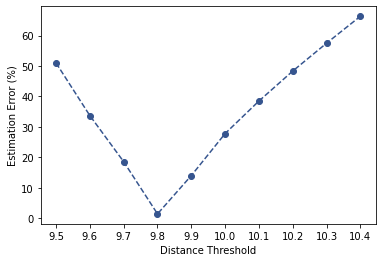

In [40]:
# Plot graph
plt.plot(np.arange(9.5,10.5, 0.1), est_errors, color='#36558F', linestyle='dashed', marker='o')
plt.xticks(np.arange(9.5,10.5, 0.1))
plt.xlabel('Distance Threshold')
plt.ylabel('Estimation Error (%)')
plt.savefig('figs/dbscan-parameter-estimation-2.png', bbox_inches='tight', dpi=100)
plt.show()